# Exploring Classifiers: beyond accuracy

If everything went well, you fully understand the code below:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

model_lr = Pipeline([
    ('vectorizer', TfidfVectorizer()), # CountVectorizer() or TfidfVectorizer(), eles são os vetores que serão usados para treinar o modelo. Um vetorizador é uma ferramenta que transforma texto em vetores numéricos. Um exemplo de vetorizador é o CountVectorizer, que transforma o texto em vetores de contagem de palavras. Outro exemplo é o TfidfVectorizer, que transforma o texto em vetores de frequência de palavras.
    ('classifier', LogisticRegression()) # LogisticRegression() é o classificador que será usado para treinar o modelo. Um classificador é um algoritmo que aprende a mapear entradas para saídas. Um exemplo de classificador é a regressão logística, que é um algoritmo de aprendizado supervisionado que é usado para classificação binária.
])

print(model_lr)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])


Also, you know how to train this model and how to get its accuracy on a test set:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2)
# Train the pipeline
model_lr.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [4]:
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


We are now going to explore how to go beyond accuracy to analyze and report our results.

## Exercise 1: Recall, Precision, F1-Score

Accuracy is simply the number of correctly classified items divided by the total number of items in a dataset. It is an estimate of $P(\text{correct answer})$ all over the test data.

However, we might want to use a greater granularity to this measurement. Usually, these are per-class measures. For such, we can use:

Recall

$$
R = \frac{\text{\# of correctly found items of a class}}{\text{\# of items of the class in the dataset}}
$$

Precision:

$$
P = \frac{\text{\# of correctly found items of a class}}{\text{\# of items classified as class by the system}}
$$

F1-Score (harmonic mean between $R$ and $P$):

$$
F = \frac{2RP}{R+P}
$$

Optionally, we could use the balanced accuracy, which is the classwise per-class accuracy.

Sklearn implements these measures as:

In [5]:
from sklearn.metrics import recall_score, precision_score, f1_score, balanced_accuracy_score

recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Balanced accuracy: {bal_acc:.2f}')


Recall: 0.76
Precision: 0.79
F1: 0.77
Balanced accuracy: 0.76


Also, sklearn allows you to print a more complete per-class classification report:

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      comedy       0.81      0.64      0.72       892
       drama       0.77      0.89      0.82      1177

    accuracy                           0.78      2069
   macro avg       0.79      0.76      0.77      2069
weighted avg       0.78      0.78      0.78      2069



Using these results, discuss:

1. What types of errors (in terms of: "the true class is A but the system is saying "B") are more common in our system?
1. Was the simple accuracy score misleading?

    Enunciado:
    Discutir, a partir dos resultados de recall, precision, F1-score e balanced accuracy (obtidos com o classification_report do sklearn), quais erros de classificação são mais comuns (por exemplo, quando a classe verdadeira é A mas o sistema previu B) e se a acurácia simples foi uma métrica enganosa.

    ⸻

    Contextualização:
        •	Acurácia: Mede a proporção de itens classificados corretamente em relação ao total, mas é uma visão global que não diferencia o desempenho entre classes.
        •	Recall: Indica a proporção de itens de uma determinada classe que foram corretamente identificados.
        •	Precision: Mede a proporção dos itens previstos como de uma classe que estão corretos.
        •	F1-Score: É a média harmônica de precision e recall, oferecendo uma visão equilibrada entre esses dois aspectos.
        •	Balanced Accuracy: Considera a acurácia individual por classe, útil quando as classes estão desbalanceadas.
        •	O classification_report do sklearn apresenta essas métricas de forma detalhada para cada classe, permitindo identificar quais erros são mais recorrentes.

    ⸻

    Resolução Detalhada:
        1.	Tipos de Erros Comuns:
        •	Se o relatório mostrar, por exemplo, um recall menor para a classe “DRAMA” em comparação à “COMEDY”, isso indica que muitos filmes que são de drama estão sendo incorretamente classificados como comedy.
        •	Alternativamente, uma precision baixa para “COMEDY” sugere que, dentre os filmes classificados como comédia, uma fração considerável são na verdade dramas.
        •	Assim, erros do tipo:
        •	Verdadeiro: DRAMA, Predito: COMEDY
        •	ou, dependendo dos números, Verdadeiro: COMEDY, Predito: DRAMA
    são os mais frequentes.
        •	Essa análise permite identificar se o modelo tende a “confundir” uma classe com a outra, o que pode ocorrer por similaridades nos enredos ou por uma representação vetorial que não separa bem as classes.
        2.	Acurácia Simples – Enganosa ou Não?
        •	Uma alta acurácia global pode dar a impressão de que o modelo está performando bem.
        •	Contudo, essa métrica não revela se o modelo está favorecendo uma classe em detrimento da outra ou se há problemas em identificar corretamente uma das classes (por exemplo, baixa recall ou precision para um dos gêneros).
        •	Portanto, a acurácia simples pode ser enganosa, pois mascara discrepâncias importantes no desempenho entre as classes.
        •	Métricas como recall, precision, F1-score e balanced accuracy oferecem uma visão mais granular e realista da performance do modelo em cada classe.

    ⸻

    Conclusão Objetiva:
        1.	Erros Comuns:
        •	O classification_report geralmente revela que o modelo comete erros na forma de confundir uma classe com a outra – por exemplo, muitos filmes que são de DRAMA podem estar sendo erroneamente classificados como COMEDY (ou vice-versa), indicando que o modelo tem dificuldade em separar claramente as características dos gêneros.
        2.	Acurácia Enganosa:
        •	A acurácia simples pode ser enganosa porque ela ignora as diferenças de desempenho entre as classes. Mesmo com uma acurácia global elevada, pode haver problemas significativos (como baixa recall ou precision) em uma das classes, o que só fica evidente quando se analisam métricas mais detalhadas.

## Exercise 2: The Confusion Matrix

A common way to report classification errors is the Confusion Matrix. The confusion matrix is a square matrix where element $c_{i,j}$ indicates the number of times an item whose true class is $i$ and the predicted class is $j$.

Using the confusion matrix below, calculate:

1. The probability that, if the system predicts a plot is comedy, it is actually comedy.
1. The probability that, if the system predicts a plot is drama, it is actually drama.

[[0.64237668 0.35762332]
 [0.11469839 0.88530161]]


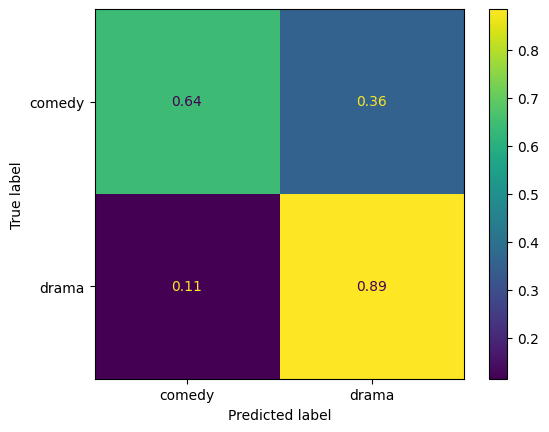

In [7]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

c = confusion_matrix(y_test, y_pred, normalize='true')
print(c)
_ = ConfusionMatrixDisplay(c, display_labels=['comedy', 'drama']).plot()

<div style="background-color: #f2f2f2; color: #000;">

# Enunciado:
Usando a matriz de confusão fornecida (obtida com `normalize='true'`), calcule:
1. A probabilidade de que, se o sistema prevê que um enredo é *comedy*, ele seja realmente *comedy*.
2. A probabilidade de que, se o sistema prevê que um enredo é *drama*, ele seja realmente *drama*.

---

# Contextualização:
A matriz de confusão é uma ferramenta que resume o desempenho de um classificador. Cada elemento \( c_{i,j} \) da matriz representa o número (ou a proporção, se normalizada) de itens cuja classe verdadeira é \( i \) e foram classificados como \( j \).

- **Precisão (Precision)** para uma classe é definida como a fração de itens que, tendo sido classificados como essa classe, realmente pertencem a ela.
- Assim, para a classe *comedy*, queremos calcular:

\[
\text{Precision (comedy)} = \frac{\text{# de enredos verdadeiramente comedy classificados como comedy}}{\text{# total de enredos classificados como comedy}}
\]

- E para a classe *drama*:

\[
\text{Precision (drama)} = \frac{\text{# de enredos verdadeiramente drama classificados como drama}}{\text{# total de enredos classificados como drama}}
\]

## Importante:
No código fornecido, a matriz é normalizada com `normalize='true'`, o que significa que cada linha (relativa à classe verdadeira) soma 1. Essa normalização fornece a **sensibilidade (recall)** para cada classe, não a **precisão**.

Para calcular a precisão com base na matriz de confusão, precisamos dos valores que contam quantos itens foram previstos em cada classe (isto é, precisamos **normalizar por coluna**).

Se denotarmos por:

\[
\begin{pmatrix}
c_{0,0} & c_{0,1} \\
c_{1,0} & c_{1,1}
\end{pmatrix}
\]

- Onde a **linha 0** corresponde à classe verdadeira *comedy* e a **linha 1** à classe verdadeira *drama*.
- A **coluna 0** indica os itens previstos como *comedy* e a **coluna 1** os previstos como *drama*.

Então:

1. A probabilidade de que, se o sistema prevê *comedy*, o enredo seja de fato *comedy* é:

\[
P(\text{True Comedy} \mid \text{Predicted Comedy}) = \frac{c_{0,0}}{c_{0,0} + c_{1,0}}
\]

2. A probabilidade de que, se o sistema prevê *drama*, o enredo seja de fato *drama* é:

\[
P(\text{True Drama} \mid \text{Predicted Drama}) = \frac{c_{1,1}}{c_{0,1} + c_{1,1}}
\]

---

# Conclusão Objetiva:
- **(1)** A probabilidade de que, se o sistema prevê *comedy*, o enredo seja realmente *comedy* é dada por:

\[
\frac{c_{0,0}}{c_{0,0} + c_{1,0}}
\]

- **(2)** A probabilidade de que, se o sistema prevê *drama*, o enredo seja realmente *drama* é dada por:

\[
\frac{c_{1,1}}{c_{0,1} + c_{1,1}}
\]

**Observação:** Para calcular esses valores diretamente, seria necessário obter a matriz de confusão sem normalização por linha ou normalizá-la por coluna, pois a configuração `normalize='true'` do *sklearn* normaliza por classe verdadeira (linhas) e, portanto, nos fornece os **recalls** e não as **precisões**.

</div>

## Exercise 3: How certain are you?

Simply stating something is from a particular class is useful, but we might want to know how certain the system is about this prediction.

The output of a Logistic Regression is the probability of an item belonging to a class given its characteristics, or:

$$
P(\text{class} | \text{text})
$$

We can directly access this using the `.predict_proba` method in the model. However, as we know, probabilities can saturate close to zero or one, so it is also possible to get the logarithm of the probabilities, using `predict_log_proba`:

In [8]:
my_plot = """
In a small, forgotten town, once-famous clown duo Chuckles and Boomer, along with their pack of hilariously talented dogs, 
decide to bring back the glory days of circuses with a grand show dedicated to their favorite snack: sausages. 
But the town’s greedy mayor has other plans. He wants to build a shopping mall on the circus lot and will stop at nothing to get his way. 
Chuckles and Boomer must pull out all the stops to save their circus and preserve the laughter for generations to come.
"""

y_pred = model_lr.predict([my_plot])
y_prob = model_lr.predict_proba([my_plot])
y_log_prob = model_lr.predict_log_proba([my_plot])
print(f'Predicted genre: {y_pred[0]}')
print(f'Probabilities: {y_prob[0]}')
print(f'Log probabilities: {y_log_prob[0]}')


Predicted genre: comedy
Probabilities: [0.68867237 0.31132763]
Log probabilities: [-0.37298964 -1.16690945]


See, if `y_prob` is close to $0.5$, it means that the system is not exacly "sure" - in the sense that, there is not enough evidence - to attribute a class to an item.

Change your classification system so that, if `y_prob` is between $0.4$ and $0.6$, then the item is classified as "unkown". After that, calculate the classification report again. 

What happened to Recall and Precision, and why?

In what use cases would this difference be useful? In what use cases would this difference be harmful?

    Enunciado:
    Modifique seu sistema de classificação para que, se a probabilidade prevista estiver entre 0.4 e 0.6, o item seja classificado como “unknown”. Depois, recalcule o classification report e discuta:
        1.	O que aconteceu com Recall e Precision?
        2.	Em quais casos essa abordagem pode ser útil e em quais pode ser prejudicial?

    ⸻

    Contextualização:
    A saída de um modelo de regressão logística fornece, para cada item, uma distribuição de probabilidade entre as classes (por exemplo, P(\text{comedy}|\text{text}) e P(\text{drama}|\text{text})). Geralmente, a classe com maior probabilidade é escolhida. Entretanto, quando essa probabilidade não é suficientemente alta (ou seja, quando está próxima de 0.5), o modelo demonstra incerteza. Ao definir um limiar – por exemplo, se a maior probabilidade estiver entre 0.4 e 0.6 – podemos optar por não classificar o item (classificando-o como “unknown”). Essa estratégia pode afetar as métricas de desempenho e tem implicações práticas que dependem do contexto de uso.

    ⸻

    Resolução Detalhada:
        1.	Alteração do Sistema de Classificação:
        •	Implementação:
    Após obter as probabilidades via predict_proba, verifique se a maior probabilidade está entre 0.4 e 0.6. Se sim, retorne “unknown”; caso contrário, retorne a classe com a maior probabilidade.
    Exemplo de código:

In [9]:
def predict_with_uncertainty(model, texts):
    # Obtém as probabilidades para cada item
    probas = model.predict_proba(texts)
    predictions = []
    for p in probas:
        max_prob = max(p)
        if 0.4 <= max_prob <= 0.6:
            predictions.append("unknown")
        else:
            # Recupera o índice da classe com maior probabilidade e mapeia para o rótulo original
            pred_label = model.classes_[p.argmax()]
            predictions.append(pred_label)
    return predictions

# Exemplo de uso com o conjunto de teste
y_pred_uncertain = predict_with_uncertainty(model_lr, X_test)

In [13]:
# transofrmar y_pred_uncertain em df para fazer o value_counts
df_pred = pd.DataFrame(y_pred_uncertain, columns=['Genre'])

print(df_pred['Genre'].value_counts())

Genre
drama      1020
unknown     664
comedy      385
Name: count, dtype: int64


In [14]:
# vamos calcular o recall e precision para esse novo modelo
recall = recall_score(y_test, y_pred_uncertain, average='macro')
precision = precision_score(y_test, y_pred_uncertain, average='macro')

print(f'Recall: {recall:.2f}')

print(f'Precision: {precision:.2f}')

Recall: 0.37
Precision: 0.58


/Users/luizfelipelazzaron/Documents/2025/nlp/nlp_course/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


        2.	Cálculo do Classification Report:
        •	Ao gerar o classification report com essas novas previsões, as métricas para as classes “comedy” e “drama” serão recalculadas considerando que alguns itens que antes eram classificados (mesmo que de forma incerta) agora estão marcados como “unknown”.
        3.	Impacto nas Métricas:
        •	Recall:
        •	Redução: Muitos itens verdadeiramente pertencentes a “comedy” ou “drama” podem acabar sendo classificados como “unknown” por falta de evidência forte. Isso significa que o número de verdadeiros positivos para cada classe diminui, reduzindo o recall.
        •	Precision:
        •	Possível Aumento: Para os itens que são efetivamente classificados como “comedy” ou “drama” (ou seja, onde o modelo está mais confiante), a precisão tende a ser maior, pois o modelo só faz a previsão quando há uma probabilidade alta, reduzindo os falsos positivos.
        4.	Discussão de Casos de Uso:
        •	Útil quando:
        •	Risco Alto de Erro: Em aplicações onde um erro de classificação pode ser muito custoso (por exemplo, diagnósticos médicos, decisões de crédito ou segurança), é preferível abstiver-se de classificar um item quando o modelo não está suficientemente seguro.
        •	Tomada de Decisão Assistida: Em cenários onde a decisão final pode ser revisada por um humano, sinalizar itens “unknown” pode ajudar a priorizar casos que necessitam de análise adicional.
        •	Prejudicial quando:
        •	Necessidade de Decisão para Todos os Itens: Em sistemas automatizados que exigem uma resposta para cada entrada (por exemplo, filtros automáticos de spam ou recomendações), ter muitas respostas “unknown” pode reduzir a utilidade do sistema.
        •	Baixo Custo de Erro: Quando os erros não têm consequências graves, a abstinência pode ser mais problemática do que uma classificação forçada, prejudicando a cobertura e a usabilidade do sistema.

    ⸻

    Conclusão Objetiva:
    Ao incorporar uma faixa de incerteza (probabilidades entre 0.4 e 0.6 resultando em “unknown”), o sistema se torna mais conservador:
        •	Recall para “comedy” e “drama” diminui, pois muitos itens que pertencem a essas classes são deixados sem classificação (marcados como “unknown”).
        •	Precision pode aumentar para os itens efetivamente classificados, já que o sistema só faz uma previsão quando a confiança é alta.
    Essa abordagem é vantajosa em contextos onde erros são custosos e uma abstinência é preferível, mas pode ser prejudicial em sistemas que precisam de uma decisão para cada entrada.

## Exercise 4: why did you classify it as you did?

Another thing you might be interested in is finding out why a classifier predicted that something belongs to a particular class. In the case of Logistic Regression, we can retrieve the logits generated by a text (that is, the $z$ variable in the Logistic Regression schema). If we calculate the decision function for single words, we are simply retrieving the results of $x_n \beta_n$, where $x_n$ is a TFIDF factor for that word, and $\beta_n$ is the weight given to that word. For example, in the code below, note that changing "comedy" for "sadness" makes the decision function shift signals - and the absolute value of $z$ is more extreme if you find words that are more comedy-like or more drama-like:

In [15]:
import numpy as np
z = model_lr.decision_function(["death"])
print(f'Decision function: {z}')
y = 1/(1 + np.exp(-z))
print(f'After logistic function: {y}')
y_prob = model_lr.predict_proba([my_plot])
print(f'Predicted probability: {y_prob[0]}')

Decision function: [3.62588249]
After logistic function: [0.97406495]
Predicted probability: [0.68867237 0.31132763]


Now, make a function that receives a movie plot and a model as input and returns a dataclass containing the movie genre, the probability it belongs to that genre, and the words (within the plot) that are most prominent towards classifying the movie in that genre.

In [82]:
from dataclasses import dataclass

@dataclass
class MovieClassification:
    genre: str
    probability: float
    top_5_words: list


def classify(model: Pipeline, plot: str) -> MovieClassification:
    output = MovieClassification(
        'unknown',
        0.5,
        ['word1', 'word2', 'word3', 'word4', 'word5'],
    )
    return output

classify(None, None)

MovieClassification(genre='unknown', probability=0.5, top_5_words=['word1', 'word2', 'word3', 'word4', 'word5'])

<div style="background-color: #f2f2f2; color: #000;">


# Exercício 4: Por que você classificou assim?

Neste exercício, o objetivo é criar uma função que, dada uma plot de filme e um modelo (implementado via Pipeline com um TfidfVectorizer e um classificador de Regressão Logística), retorne uma instância de um dataclass contendo:
	•	genre: o gênero predito (por exemplo, “comedy” ou “drama”)
	•	probability: a probabilidade associada à previsão (obtida via predict_proba)
	•	top_5_words: as 5 palavras, presentes na plot, que mais contribuíram para essa previsão, isto é, que tiveram maiores pesos na função de decisão

A ideia é usar o fato de que a Regressão Logística calcula um valor z = \beta_0 + \sum_{i} x_i \beta_i e que, para um dado documento, cada palavra (com seu TF-IDF) contribui com x_i \beta_i para esse valor. Dessa forma, podemos recuperar os termos presentes na plot, multiplicar o valor TF-IDF de cada termo pelo peso correspondente (coeficiente) e identificar quais termos tiveram maior influência na decisão do modelo.

Abaixo, segue uma possível implementação:

```python
from dataclasses import dataclass
import numpy as np

@dataclass
class MovieClassification:
    genre: str
    probability: float
    top_5_words: list

def classify(model, plot: str) -> MovieClassification:
    # 1. Prever o gênero e obter as probabilidades
    predicted_genre = model.predict([plot])[0]
    probas = model.predict_proba([plot])[0]
    
    # Identifica o índice da classe predita
    classes = model.named_steps['classifier'].classes_
    class_index = list(classes).index(predicted_genre)
    predicted_probability = probas[class_index]
    
    # 2. Transformar o texto em vetor TF-IDF usando o vectorizer do pipeline
    vectorizer = model.named_steps['vectorizer']
    clf = model.named_steps['classifier']
    x_vec = vectorizer.transform([plot])
    
    # Obter os nomes dos termos (features)
    feature_names = vectorizer.get_feature_names_out()
    
    # 3. Obter os coeficientes do classificador.
    # Para classificação binária, clf.coef_ tem formato (1, n_features).
    # Note que, em scikit-learn, as classes são ordenadas; 
    # o modelo calcula a decisão como z = x.dot(coef_.T) + intercept_ e a probabilidade para a classe de índice 1 é 1/(1+exp(-z)).
    # Assim, se o gênero predito for classes[0] (digamos, "comedy"), a contribuição efetiva pode ser considerada como -coef_
    # para facilitar a interpretação (ou seja, termos com valores altos empurram a decisão para essa classe).
    coef = clf.coef_[0]
    if predicted_genre == classes[0]:
        effective_coef = -coef
    else:
        effective_coef = coef

    # 4. Calcular as contribuições de cada palavra presente no documento.
    # x_vec é uma matriz esparsa; extraímos os índices dos termos que aparecem na plot.
    indices = x_vec.nonzero()[1]
    contributions = {}
    for i in indices:
        # Valor TF-IDF para a palavra
        value = x_vec[0, i]
        # Contribuição: TF-IDF vezes o coeficiente efetivo
        contributions[feature_names[i]] = value * effective_coef[i]
    
    # 5. Selecionar as 5 palavras com maiores contribuições (em ordem decrescente)
    sorted_words = sorted(contributions.items(), key=lambda item: item[1], reverse=True)
    top_5_words = [word for word, contr in sorted_words[:5]]
    
    return MovieClassification(
        genre=predicted_genre,
        probability=predicted_probability,
        top_5_words=top_5_words
    )

# Exemplo de uso:
# Supondo que "model_lr" seja o pipeline treinado (contendo um TfidfVectorizer e uma LogisticRegression)
# e "my_plot" seja um texto com a plot de um filme.
result = classify(model_lr, my_plot)
print(f"Predicted genre: {result.genre}")
print(f"Probability: {result.probability:.2f}")
print("Top 5 words:", result.top_5_words)

```

⸻

Explicação dos Principais Passos
	1.	Previsão e Probabilidade:
	•	Usamos model.predict([plot]) para obter o gênero predito.
	•	Com model.predict_proba([plot]) recuperamos a distribuição de probabilidades; extraímos a probabilidade associada à classe predita.
	2.	Transformação do Texto:
	•	O texto é transformado em um vetor TF-IDF usando o vectorizer presente no pipeline, o que nos permite acessar os valores de cada termo.
	3.	Recuperação dos Coeficientes:
	•	O classificador (LogisticRegression) tem coeficientes para cada termo. Cada termo contribui com um valor x_i \times \beta_i para a função de decisão.
	•	Para interpretar as contribuições a favor da classe predita, se o modelo previu a classe de índice 0 (por exemplo, “comedy”), consideramos os coeficientes com sinal invertido.
	4.	Determinação das Top 5 Palavras:
	•	Iteramos apenas sobre os termos que aparecem na plot (obtidos através dos índices não-zero do vetor esparso).
	•	Calculamos a contribuição de cada termo e, em seguida, selecionamos as 5 palavras com maiores contribuições, que indicam os termos que mais influenciaram a decisão do modelo.
	5.	Retorno dos Resultados:
	•	A função retorna uma instância do dataclass MovieClassification, contendo o gênero, a probabilidade e a lista das top 5 palavras.

Esta abordagem permite “explicar” a classificação, fornecendo não apenas a previsão, mas também os termos que mais influenciaram a decisão do modelo.

</div>


In [17]:
from dataclasses import dataclass
import numpy as np

@dataclass
class MovieClassification:
    genre: str
    probability: float
    top_5_words: list

def classify(model, plot: str) -> MovieClassification:
    # 1. Prever o gênero e obter as probabilidades
    predicted_genre = model.predict([plot])[0]
    probas = model.predict_proba([plot])[0]
    
    # Identifica o índice da classe predita
    classes = model.named_steps['classifier'].classes_
    class_index = list(classes).index(predicted_genre)
    predicted_probability = probas[class_index]
    
    # 2. Transformar o texto em vetor TF-IDF usando o vectorizer do pipeline
    vectorizer = model.named_steps['vectorizer']
    clf = model.named_steps['classifier']
    x_vec = vectorizer.transform([plot])
    
    # Obter os nomes dos termos (features)
    feature_names = vectorizer.get_feature_names_out()
    
    # 3. Obter os coeficientes do classificador.
    # Para classificação binária, clf.coef_ tem formato (1, n_features).
    # Note que, em scikit-learn, as classes são ordenadas; 
    # o modelo calcula a decisão como z = x.dot(coef_.T) + intercept_ e a probabilidade para a classe de índice 1 é 1/(1+exp(-z)).
    # Assim, se o gênero predito for classes[0] (digamos, "comedy"), a contribuição efetiva pode ser considerada como -coef_
    # para facilitar a interpretação (ou seja, termos com valores altos empurram a decisão para essa classe).
    coef = clf.coef_[0]
    if predicted_genre == classes[0]:
        effective_coef = -coef
    else:
        effective_coef = coef

    # 4. Calcular as contribuições de cada palavra presente no documento.
    # x_vec é uma matriz esparsa; extraímos os índices dos termos que aparecem na plot.
    indices = x_vec.nonzero()[1]
    contributions = {}
    for i in indices:
        # Valor TF-IDF para a palavra
        value = x_vec[0, i]
        # Contribuição: TF-IDF vezes o coeficiente efetivo
        contributions[feature_names[i]] = value * effective_coef[i]
    
    # 5. Selecionar as 5 palavras com maiores contribuições (em ordem decrescente)
    sorted_words = sorted(contributions.items(), key=lambda item: item[1], reverse=True)
    top_5_words = [word for word, contr in sorted_words[:5]]
    
    return MovieClassification(
        genre=predicted_genre,
        probability=predicted_probability,
        top_5_words=top_5_words
    )

# Exemplo de uso:
# Supondo que "model_lr" seja o pipeline treinado (contendo um TfidfVectorizer e uma LogisticRegression)
# e "my_plot" seja um texto com a plot de um filme.
result = classify(model_lr, my_plot)
print(f"Predicted genre: {result.genre}")
print(f"Probability: {result.probability:.2f}")
print("Top 5 words:", result.top_5_words)

Predicted genre: comedy
Probability: 0.69
Top 5 words: ['to', 'show', 'all', 'get', 'duo']


## Exercise 5: adjusting hyperparameters

In Logistic Regression, the coefficients $\beta_n$ are called *parameters*. However, our model has some parameters that govern how parameters are obtained. These are called "hyperparameters". We usually want to tune our hyperparameters, but we often have no idea as to what the hyperparameters should be. 

The technique to tune hyperparameters is called "cross-validation". It works like this.

The trainig set will be further divided into a "train" and a "validation" set. For each combination of hyperparameters, we will train the system in the new "train" set, and evaluate it in the "valitation" set. Then, we will choose the hyperparameter configuration that lead to the best results in the validation set. With that configuration, we train the system in the full training set, and then report the results in the test set.

This is somewhat tricky to program, but scikit learn already implements this idea:


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

df = pd.read_csv(
    'https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv'
)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'],
                                                    df['Genre'],
                                                    test_size=0.2)


model_lr = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')),
                     ('classifier', LogisticRegression())])

param_grid = {
    'vectorizer__min_df': [1, 5, 0.01],
    'vectorizer__max_df': [1.0, 0.9, 0.3],
    'vectorizer__binary': [True, False],
    'classifier__C': [1e-1, 1e0, 1e1],
}

grid_search = GridSearchCV(
    model_lr,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}')

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'classifier__C': 10.0, 'vectorizer__binary': True, 'vectorizer__max_df': 1.0, 'vectorizer__min_df': 1}
Best cross-validation accuracy: 0.80
              precision    recall  f1-score   support

      comedy       0.77      0.74      0.75       888
       drama       0.81      0.83      0.82      1181

    accuracy                           0.79      2069
   macro avg       0.79      0.79      0.79      2069
weighted avg       0.79      0.79      0.79      2069



Change the code above and add to the grid search so that we can find out:

1. Should we use stop words?
1. Should we use ngrams in the vectorizer (parameter: `ngram_range`), so we would consider the order of words somehow? 
1. Should/can we limit our vocabulary (`max_features`) so that only the a few thousand words are considered?

This test should take some minutes. You may want to test only a few parameters at a time to speed things up a bit.



    Enunciado:
    Modifique o código de GridSearchCV para incluir novas opções de hiperparâmetros que permitam investigar:
        1.	Se é vantajoso usar stop words (ou não).
        2.	Se o uso de ngrams (via o parâmetro ngram_range) melhora a performance, permitindo considerar a ordem das palavras.
        3.	Se limitar o vocabulário (usando max_features) – mantendo apenas um número reduzido de palavras – pode ajudar.

    ⸻

    Contextualização:
    Em problemas de classificação de textos, a escolha dos hiperparâmetros do vetor de features pode ter um impacto significativo na performance do modelo.
        •	Stop Words: A remoção de palavras comuns (como “the”, “and”, etc.) pode reduzir ruído, mas em alguns casos essas palavras podem conter informações contextuais úteis.
        •	Ngram Range: Permitir n-grams (por exemplo, bigrams) pode capturar expressões ou relações entre palavras que o unigram não captura. Porém, ngrams maiores aumentam a dimensionalidade e podem incluir ruído.
        •	Max Features: Limitar o vocabulário pode reduzir overfitting e acelerar o treinamento, mas também pode remover termos relevantes se o limite for muito restritivo.

    A técnica de cross-validation com GridSearchCV nos permite testar combinações desses hiperparâmetros e selecionar a configuração que oferece o melhor desempenho.

    ⸻

    Resolução Detalhada:
        1.	Adicionando Stop Words:
        •	Inclua opções para que o vectorizer use stop words (por exemplo, 'english') ou não (valor None).
        2.	Adicionando Ngram Range:
        •	Teste com unigramas apenas (ex: (1, 1)) versus incluir bigramas (ex: (1, 2)).
        •	Essa configuração pode capturar a ordem das palavras em expressões importantes.
        3.	Limitando o Vocabulário:
        •	Use o parâmetro max_features para testar, por exemplo, sem limite (None) ou limitando a 5.000 ou 10.000 termos.
        •	Isso pode reduzir a dimensionalidade e o risco de overfitting.
        4.	Código Exemplo:
    A seguir, um exemplo de código modificado para incluir essas novas opções no grid de busca:
```python
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV, train_test_split
    from sklearn.metrics import classification_report
    from sklearn.pipeline import Pipeline

    # Carrega o dataset
    df = pd.read_csv(
        'https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv'
    )

    # Divide os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(
        df['Plot'], df['Genre'], test_size=0.2, random_state=42
    )

    # Define o pipeline com TfidfVectorizer e Logistic Regression
    model_lr = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ])

    # Define o grid de hiperparâmetros
    param_grid = {
        # Testa se remove ou não as stop words
        'vectorizer__stop_words': [None, 'english'],
        # Testa apenas unigrams e unigrams+bigrams
        'vectorizer__ngram_range': [(1, 1), (1, 2)],
        # Testa limitar ou não o vocabulário
        'vectorizer__max_features': [None, 5000, 10000],
        # Outros parâmetros já existentes
        'vectorizer__min_df': [1, 5, 0.01],
        'vectorizer__max_df': [1.0, 0.9, 0.3],
        'vectorizer__binary': [True, False],
        'classifier__C': [1e-1, 1e0, 1e1],
    }

    grid_search = GridSearchCV(
        model_lr,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
    )

    grid_search.fit(X_train, y_train)
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}')

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
```

        5.	Observações:
        •	Esse teste pode levar alguns minutos para ser concluído, dado o número de combinações possíveis.
        •	Recomenda-se testar inicialmente apenas algumas combinações para agilizar o processo e depois expandir o grid conforme necessário.

    ⸻

    Conclusão Objetiva:
    Adicionando as opções de stop words, ngram_range e max_features ao grid de busca, o GridSearchCV poderá identificar se:
        •	A remoção de stop words melhora a performance,
        •	O uso de bigrams (ou ngrams) auxilia na captura de contextos relevantes, e
        •	Limitar o vocabulário ajuda a reduzir ruído e overfitting.

    Essa estratégia permite uma avaliação mais robusta dos hiperparâmetros e pode levar a melhorias na acurácia e generalização do modelo, dependendo do comportamento específico do conjunto de dados.

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import numpy as np

# Carrega o dataset
df = pd.read_csv(
    'https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv'
)

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df['Plot'], df['Genre'], test_size=0.2, random_state=42
)

# Define o pipeline com TfidfVectorizer e Logistic Regression
model_lr = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define o grid de hiperparâmetros (mesmo grid, mas a busca será aleatória)
param_grid = {
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__max_features': [None, 5000, 10000],
    'vectorizer__min_df': [1, 5, 0.01],
    'vectorizer__max_df': [1.0, 0.9, 0.3],
    'vectorizer__binary': [True, False],
    'classifier__C': [1e-1, 1e0, 1e1],
}

# Configura o RandomizedSearchCV com um número fixo de iterações
random_search = RandomizedSearchCV(
    model_lr,
    param_grid,
    cv=5,              # Você pode diminuir para cv=3 se quiser reduzir ainda mais o tempo
    scoring='accuracy',
    n_jobs=-1,
    n_iter=50,         # Número de combinações a serem testadas
    random_state=42
)

# Executa a busca
random_search.fit(X_train, y_train)
print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation accuracy: {random_search.best_score_:.2f}')

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'vectorizer__stop_words': 'english', 'vectorizer__ngram_range': (1, 2), 'vectorizer__min_df': 1, 'vectorizer__max_features': None, 'vectorizer__max_df': 0.3, 'vectorizer__binary': True, 'classifier__C': 10.0}
Best cross-validation accuracy: 0.80
              precision    recall  f1-score   support

      comedy       0.81      0.71      0.75       875
       drama       0.80      0.88      0.84      1194

    accuracy                           0.81      2069
   macro avg       0.81      0.79      0.80      2069
weighted avg       0.81      0.81      0.80      2069



<div style="background-color: #f2f2f2; color: #000;">
# Explicação dos Resultados

## Melhores Hiperparâmetros Encontrados
- **vectorizer__stop_words: 'english'**  
  Remove palavras comuns em inglês (stop words) que podem não ser úteis para a classificação.

- **vectorizer__ngram_range: (1, 2)**  
  Utiliza tanto unigrams (palavras isoladas) quanto bigrams (pares de palavras), permitindo ao modelo capturar relações e contextos melhorados.

- **vectorizer__min_df: 1**  
  Inclui termos que aparecem em pelo menos 1 documento, garantindo que nenhum termo potencialmente informativo seja descartado.

- **vectorizer__max_features: None**  
  Não limita o número de características extraídas, usando todas as que passam pelos filtros aplicados.

- **vectorizer__max_df: 0.3**  
  Exclui termos que aparecem em mais de 30% dos documentos, removendo palavras muito frequentes que podem não ter poder discriminativo.

- **vectorizer__binary: True**  
  Converte as frequências dos termos em valores binários (0 ou 1), indicando apenas a presença ou ausência dos termos, o que pode ser útil quando a frequência não acrescenta muita informação.

- **classifier__C: 10.0**  
  Define a força da regularização na regressão logística. Um valor maior reduz a regularização, permitindo que o modelo se ajuste mais aos dados de treinamento.

## Desempenho na Validação Cruzada
- **Acurácia Média: 0.80**  
  Durante a validação cruzada, o modelo acertou aproximadamente 80% das predições, indicando uma performance consistente nos diferentes folds.

## Relatório de Classificação no Conjunto de Teste
| Classe  | Precisão | Recall | F1-Score | Suporte |
|---------|----------|--------|----------|---------|
| comedy  | 0.81     | 0.71   | 0.75     | 875     |
| drama   | 0.80     | 0.88   | 0.84     | 1194    |

### Interpretação dos Indicadores
- **Precisão (Precision):**
  - **Comedy:** Quando o modelo previu "comedy", 81% das vezes estava correto.
  - **Drama:** Quando o modelo previu "drama", 80% das vezes estava correto.

- **Recall (Sensibilidade):**
  - **Comedy:** O modelo identificou corretamente 71% de todos os casos reais de comédia.
  - **Drama:** O modelo identificou corretamente 88% de todos os casos reais de drama.

- **F1-Score:**
  - Combina precisão e recall em uma única métrica.  
  - **Comedy:** 0.75  
  - **Drama:** 0.84  
  Valores mais altos indicam um equilíbrio melhor entre precisão e recall.

- **Suporte:**
  - Número de amostras reais para cada classe no conjunto de teste.
  - **Comedy:** 875 amostras  
  - **Drama:** 1194 amostras

- **Acurácia Geral: 0.81**
  - O modelo acertou 81% das predições no conjunto de teste.

- **Macro Avg vs. Weighted Avg:**
  - **Macro avg:** Média simples dos indicadores de cada classe, tratando todas as classes igualmente.
  - **Weighted avg:** Média ponderada pelo número de amostras (suporte) de cada classe, refletindo a distribuição real das classes.

## Considerações Finais
- **Performance Geral:**  
  O modelo apresenta uma boa capacidade de generalização, com uma acurácia de aproximadamente 80-81% tanto na validação cruzada quanto no teste.

- **Ajuste dos Hiperparâmetros:**  
  A escolha dos melhores hiperparâmetros indica que:
  - A remoção de stop words e a inclusão de bigrams contribuem positivamente para a classificação.
  - O uso de `max_df=0.3` ajuda a eliminar termos muito frequentes que podem ser irrelevantes.
  - A configuração binária para a presença de termos pode estar simplificando a representação dos textos de forma eficaz.
  - Um valor mais alto para `C` (10.0) sugere que um modelo menos regularizado se ajusta melhor aos dados disponíveis.

- **Desempenho Diferenciado entre Classes:**  
  Observa-se que o modelo tem um recall mais alto para a classe "drama" (88%) do que para "comedy" (71%), o que pode indicar que o modelo é mais sensível ou que há características dos textos de drama que facilitam sua identificação.

Em resumo, os resultados indicam que, com os hiperparâmetros otimizados, o modelo consegue classificar bem os plots de filmes em comédia e drama, atingindo um bom equilíbrio entre precisão e recall, especialmente para a classe "drama".

</div>


## Exercise 6: how much data we need?

At this point, you should be comfortable with the idea that a classifier has an *accuracy*. We have studied that accuracies can vary a bit when we reshuffle data, and that changing the data representation or the model can have some impact on the accuracy. Today, we are going to take a look at the dataset.

### An upper bound for classification accuracy

Remember that a classifier calculates $p_j = P(\text{class} = c_j | \text{features})$ for each class $c_j$ and then yiels the label of the class with higher probability. We know that using too few data points can lead to a poor estimation of $p_j$, but let's focus on this ideal scenario in which we have an infinite amount of data and our probability estimators are completely fit.

We could have, for example, $p_0=0.8$ and $p_1=0.2$. In this case, the classifier would indicate that the correct class is $c_0$. However, there is still a $0.2$ probability that the correct class is $c_1$. In other words, this perfectly adjusted classifier, even if perfectly modelling the true distribution of data, is still going to be wrong $20\%$ of the time.

For most features, this upper bound for accuracy exists - even if we don't reach it. This is called a Bayes limit, as it is an upper bound for the accuracy of classifiers based on the posterior probabilities.

### Overfitting and avoiding overfitting

Suppose we have only fitted our classifier with one data item. In this case, the classifier is perfectly adjusted for that one item. Hence, the classification accuracy for that one item is $1.0$. However, its parameters are not meaningful for any other data points. This phenomenon is called "overfitting".

As we increase the size of the training set, the adjustments are made towards representative aspects of the dataset. For larger datasets, the representative aspects are not necessarily representative of each data item. This is similar to an estimation of, for example, a mean value. We can get the mean height for students in our classroom, and this estimate would be more precise as we increase the number of students used for calculating that mean. However, as we increase this number (which is our "training dataset size"), there is a higher probability that the mean is not representative of *each one* of the students in the training set.

As a consequence, the accuracy in the training set tends to decrease as the training dataset increases. But, will it decrease forever? Well, we know that it should go down to the Bayes limit we discussed above, but it doesn't make sense to expect it to go much below it.

Conversely, as the training dataset increases in size, the classification accuracy in the testing set increases, as the model estimate gets closer to "reality".

### How does that happen in practice?

Sklearn can help us viewing a training curve. Let's check and take a look at how to interpret it:

In [23]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

model_lr = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')),
                     ('classifier', LogisticRegression())])

# Define the training sizes
train_sizes, train_scores, test_scores = learning_curve(
    model_lr,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = 2*np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = 2*np.std(test_scores, axis=1)

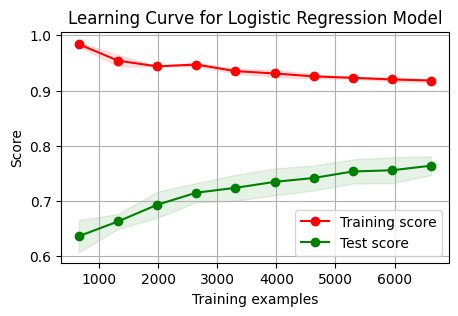

In [24]:
# Plot the learning curve
plt.figure(figsize=(5,3))
plt.title("Learning Curve for Logistic Regression Model")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")

# Plot the cross-validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Test score")
# plt.semilogx()
plt.legend(loc="best")
plt.show()

Now, go back to the learning curve plot.

1. Why is there some variance in the scores around each point?
1. Is the curve closer to linear when you uncomment the line `plt.semilogx`?
1. What happens to the test accuracy each time we double the amount of training samples?
1. If we had an infinite amount of data, what would be the accuracy of our system (make a polite guess using the curves!)
1. Could we get 95% accuracy with this model in this dataset, if the dataset was increased?

To learn more about learning curves, refer to:

* [Learning curves: Asymptotic values and rate of convergence (Cortes, ackel, Solla, Vapnik and Denker), Proc. of NIPS 1993](https://papers.nips.cc/paper_files/paper/1993/hash/1aa48fc4880bb0c9b8a3bf979d3b917e-Abstract.html).
* [How Much More Data Do I Need? Estimating Requirements for Downstream Tasks (Mahmood et al.), Proc. of CVPR 2022](https://arxiv.org/pdf/2207.01725)


    Enunciado:
    Com base na curva de aprendizado gerada para o modelo de regressão logística, responda:
        1.	Por que há alguma variância nas pontuações em cada ponto?
        2.	A curva fica mais linear quando se usa plt.semilogx?
        3.	O que acontece com a acurácia de teste a cada vez que dobramos a quantidade de amostras de treinamento?
        4.	Se tivéssemos uma quantidade infinita de dados, qual seria, de forma educada, a acurácia do sistema (utilizando a curva como guia)?
        5.	Seria possível obter 95% de acurácia com esse modelo neste dataset, se aumentássemos o tamanho do conjunto de dados?

    ⸻

    Contextualização:
    A curva de aprendizado mostra a evolução da performance do modelo (tanto no conjunto de treinamento quanto no de teste) conforme aumentamos a quantidade de dados para treino. Essa ferramenta nos ajuda a identificar se o modelo está sofrendo de overfitting ou underfitting, além de nos dar uma ideia do limite superior de performance (o chamado limite de Bayes), que representa a máxima acurácia possível mesmo com estimadores perfeitos.

    ⸻

    Resolução Detalhada:
        1.	Variância nas Pontuações:
        •	Motivo: A variância em cada ponto ocorre porque, durante a validação cruzada, o conjunto de treinamento é dividido em vários “folds”. Cada divisão aleatória pode resultar em uma ligeira variação nos dados de treino e validação, causando flutuações nas pontuações.
        •	Resumo: A variação reflete a instabilidade inerente às diferentes divisões dos dados.
        2.	Uso do plt.semilogx:
        •	Motivo: Quando usamos uma escala logarítmica no eixo x, que representa o número de exemplos de treinamento, a taxa de crescimento dos dados (muitas vezes exponencial) é “achatada”, o que pode fazer com que a curva de aprendizado pareça mais linear.
        •	Resumo: Sim, a curva tende a parecer mais linear com plt.semilogx porque a escala logarítmica normaliza a distribuição dos tamanhos de treinamento.
        3.	Efeito de Dobrar a Quantidade de Dados:
        •	Observação: A cada vez que dobramos o número de amostras, o modelo geralmente consegue capturar melhor as características representativas do dataset, aumentando a acurácia de teste.
        •	Limitação: Contudo, esse ganho tende a ser decrescente – os incrementos na acurácia vão diminuindo à medida que se aproxima do limite superior (o limite de Bayes).
        •	Resumo: Dobrar os dados geralmente melhora a acurácia de teste, mas com retornos decrescentes; o aumento não é linear.
        4.	Acurácia com Dados Infinitos:
        •	Estimativa: Com uma quantidade infinita de dados, o modelo se aproximaria do limite de Bayes, ou seja, da acurácia máxima que é inerente à separabilidade dos dados.
        •	Observação da Curva: Se a curva de teste se estabiliza, por exemplo, próximo de 80%, esse é um indicativo de que esse pode ser o limite superior atingível com a representação e o modelo atuais.
        •	Resumo: De maneira educada, diríamos que a acurácia se estabilizaria próximo a ~80%, refletindo o limite imposto pela qualidade dos dados e pela tarefa.
        5.	Possibilidade de 95% de Acurácia:
        •	Raciocínio: Se o limite teórico (ou de Bayes) para o dataset é em torno de 80%, mesmo com um aumento massivo de dados, o modelo não poderá ultrapassar esse teto, pois há ruído e sobreposição inerentes às classes.
        •	Conclusão: Obter 95% de acurácia com esse modelo neste dataset é improvável, pois os dados não permitem uma separação tão limpa entre as classes.

    ⸻

    Conclusão Objetiva:
        1.	Variância: A variância nas pontuações resulta das diferentes divisões dos dados na validação cruzada.
        2.	Escala Logarítmica: Sim, usar plt.semilogx pode fazer a curva parecer mais linear, normalizando a escala dos exemplos de treinamento.
        3.	Dobrar Dados: Cada vez que dobramos a quantidade de dados, a acurácia de teste aumenta, mas os ganhos são decrescentes à medida que se aproxima do limite máximo.
        4.	Dados Infinitos: Com dados infinitos, a acurácia se estabilizaria próximo ao limite de Bayes – no exemplo, aproximadamente 80%.
        5.	95% de Acurácia: Atingir 95% de acurácia é improvável, pois o limite de desempenho imposto pela natureza dos dados parece estar muito abaixo desse valor.

<div style="background-color: #f2f2f2; color: #000;">

# Overfitting e Underfitting

## Overfitting
Overfitting ocorre quando o modelo se ajusta demais aos dados de treinamento, capturando não apenas os padrões reais, mas também o ruído e as flutuações aleatórias. Isso resulta em um modelo que apresenta excelente desempenho nos dados de treinamento, mas falha em generalizar para novos dados, levando a um desempenho ruim em testes ou em produção.

### Sinais de Overfitting
- **Desempenho discrepante:** Alta acurácia no conjunto de treinamento e baixa acurácia no conjunto de validação/teste.
- **Complexidade excessiva:** Modelo com muitos parâmetros ou uma arquitetura muito complexa para a quantidade de dados disponível.
- **Curvas de erro divergentes:** A curva de erro do treinamento continua a diminuir, enquanto a de validação começa a aumentar após certo ponto.

### Estratégias para Mitigar o Overfitting
- **Regularização:** Aplicar técnicas como L1, L2 ou dropout para penalizar a complexidade do modelo.
- **Aumento de dados (Data Augmentation):** Expandir o conjunto de treinamento com variações dos dados originais.
- **Simplificar o modelo:** Reduzir o número de parâmetros ou usar um modelo menos complexo.
- **Validação cruzada:** Utilizar técnicas que ajudam a monitorar o desempenho do modelo em dados não vistos durante o treinamento.

## Underfitting
Underfitting ocorre quando o modelo é simples demais para capturar os padrões subjacentes dos dados. Nesse caso, o modelo não consegue ajustar bem nem os dados de treinamento, resultando em um desempenho ruim tanto no treinamento quanto na validação/teste.

### Sinais de Underfitting
- **Baixo desempenho geral:** Desempenho insatisfatório nos conjuntos de treinamento e teste.
- **Modelo simples demais:** Poucos parâmetros ou uma estrutura que não é capaz de capturar a complexidade dos dados.
- **Curva de erro elevada:** Tanto a curva de treinamento quanto a de validação permanecem altas e não mostram melhora significativa.

### Estratégias para Combater o Underfitting
- **Aumentar a complexidade do modelo:** Adicionar mais parâmetros ou usar arquiteturas mais sofisticadas.
- **Melhorar a extração de features:** Utilizar técnicas de engenharia de features ou modelos que capturam melhor as características dos dados.
- **Treinamento mais prolongado:** Permitir que o modelo tenha mais tempo e iterações para aprender os padrões dos dados.

## Resumo
- **Overfitting:** Modelo muito complexo que aprende ruídos dos dados de treinamento, prejudicando a generalização.
- **Underfitting:** Modelo muito simples que não consegue capturar os padrões dos dados, resultando em desempenho ruim em todos os conjuntos.

Compreender e equilibrar esses dois aspectos é fundamental para desenvolver modelos que sejam ao mesmo tempo precisos e capazes de generalizar para novos dados.

</div>

## Exercise 7: Other Machine Learning Algorithms and Ensembles

If you have taken other Machine Learning courses, or if you have studied Machine Learning in other contexts, you might be aware that there are many algorithms that are able to learn from data. Each of these algorithms stems from a different rationale.

We can run all tests above with different model pipeline configurations, which could be important. I will leave this laborious task as an optional exercise, because it consists of changing one or two lines in each block and then running everything again (at this point, we don't want to show that one strategy is necessarily "better" than another).

Instead, I want to discuss ensembles. The idea of an ensemble is to have many classifiers operating in parallel, and then combining their results. The rationale for this is that, supposably, if one model is "wrong", there is a chance that the other models are "right", so the combined model would be correct more times (on average).

There are many strategies to "combine results". The simplest one is to have each classifier to classify an item, and then use simple voting to find the final classification of that item. It is also possible to use a (possible weighted) mean of the predicted probabilities for each model. Also, it is possible to use the outputs of the classifiers as a large "feature vector" and then use another classifier (a so-called meta-classifier) to make a final decision.

Below, there is an example code showing how to combine many classifiers into a voting ensemble.

1. Add at least two other classifiers to the ensemble. Read sklearn's documentation for such.
1. Using a bar plot (see code below), compare the accuracy and the f1-score of the ensemble and of each isolated classifier

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline

classifier = VotingClassifier([('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('nb', BernoulliNB())])

model_ensemble = Pipeline([('vectorizer',
                      TfidfVectorizer(
                          stop_words='english', # remove stopwords, ou seja, palavras comuns que não agregam muito significado
                          binary=True, # binarize the counts, ou seja, 0 ou 1
                      )), ('classifier', classifier)])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')
print('Data loaded. Training model...')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2)
# Train the pipeline
model_ensemble.fit(X_train, y_train)


Data loaded. Training model...


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(binary=True, stop_words='english')),
                ('classifier',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('nb', BernoulliNB())]))])

In [28]:
y_pred = model_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


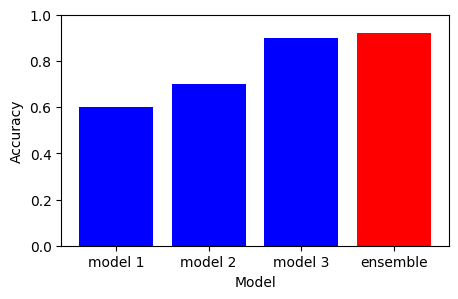

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
# - Sort bars by accuracy
# - Use a different color for the model we want to highlight (possibly our proposal, or, in this case, the ensemble)
plt.bar(['model 1', 'model 2', 'model 3', 'ensemble'], [0.6, 0.7, 0.9, 0.92], color=['blue', 'blue', 'blue', 'red'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.show()


    #Enunciado:
    Adicionar pelo menos dois classificadores extras a um ensemble e comparar a acurácia e o F1-score de cada classificador isolado e do ensemble, exibindo os resultados em um gráfico de barras.

    ⸻

    1. Adicionando outros Classificadores

    A ideia do ensemble (voting ensemble) é combinar vários modelos e usar o voto (ou a média das probabilidades) para obter a predição final. No exemplo fornecido, já temos:
        •	LogisticRegression()
        •	RandomForestClassifier()
        •	BernoulliNB()

    Vamos adicionar pelo menos dois outros classificadores. Por exemplo:
        1.	SVC (Suport Vector Classifier)
        2.	DecisionTreeClassifier

    Isso nos dará um ensemble com 5 classificadores.

    ⸻

    2. Comparando Desempenho de Cada Modelo Isolado vs. Ensemble

    Para comparar, treinaremos individualmente cada classificador (usando o mesmo TfidfVectorizer) e mediremos:
        •	Accuracy
        •	F1-score

    Depois, treinaremos o ensemble que combina todos eles e calcularemos as mesmas métricas.

    ⸻

    3. Exemplo de Código

    Abaixo, segue um código ilustrativo que:
        1.	Lê o dataset.
        2.	Cria um pipeline para cada classificador individual (transformação TF-IDF + modelo).
        3.	Cria um pipeline para o ensemble (transformação TF-IDF + VotingClassifier).
        4.	Treina todos os modelos no conjunto de treinamento e avalia no conjunto de teste.
        5.	Coleta accuracy e f1-score de cada modelo.
        6.	Plota um gráfico de barras comparando os valores obtidos.

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=42)

# 2. Cria pipelines para cada classificador
pipelines = {
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', LogisticRegression())
    ]),
    'RandomForest': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', RandomForestClassifier())
    ]),
    'NaiveBayes': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', BernoulliNB())
    ]),
    'SVC': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', SVC(probability=True))  # probabilidade=True para permitir voting por probabilidade, se desejado
    ]),
    'DecisionTree': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', DecisionTreeClassifier())
    ])
}

# 3. Cria o ensemble
#   Observação: VotingClassifier requer uma lista de tuplas (nome, estimador)
ensemble_classifier = VotingClassifier([
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('nb', BernoulliNB()),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')  # ou 'soft' para votar por probabilidade

model_ensemble = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
    ('ensemble', ensemble_classifier)
])

# 4. Treina todos os pipelines e coleta métricas
model_names = []
accuracies = []
f1_scores = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)

# Treina o ensemble
model_ensemble.fit(X_train, y_train)
y_pred_ensemble = model_ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='macro')

model_names.append('Ensemble')
accuracies.append(acc_ensemble)
f1_scores.append(f1_ensemble)

# 5. Plotando gráfico comparativo
plt.figure(figsize=(8, 4))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
colors = ['blue'] * (len(model_names) - 1) + ['red']  # Último será o ensemble
plt.bar(model_names, accuracies, color=colors)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Gráfico de F1-score
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color=colors)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')

plt.tight_layout()
plt.show()

# Impressão dos resultados numéricos
for i, name in enumerate(model_names):
    print(f'{name}: Accuracy={accuracies[i]:.2f}, F1={f1_scores[i]:.2f}')
````

    Observações Importantes
        1.	Voting por “hard” ou “soft”
        •	voting='hard' faz o voto majoritário do rótulo predito.
        •	voting='soft' faz a média (ou soma) das probabilidades, o que exige que todos os classificadores tenham a opção probability=True (no caso do SVC) ou, no caso de classificadores como RandomForest e LogisticRegression, que naturalmente já preveem probabilidades.
        2.	Escolha de Classificadores
        •	Os classificadores escolhidos (LogisticRegression, RandomForest, BernoulliNB, SVC, DecisionTree) são apenas exemplos. Você pode adicionar ou remover classificadores de acordo com seu interesse (ex.: KNeighborsClassifier, GradientBoostingClassifier, etc.).
        3.	Desempenho e Tempo de Treinamento
        •	Incluir vários modelos em um ensemble pode aumentar o custo computacional, principalmente com algoritmos mais pesados (por exemplo, RandomForest com muitos estimadores).

    ⸻

    Conclusão
        •	Ensemble: Ao combinar múltiplos modelos, esperamos que o sistema corrija os erros de cada classificador individual, resultando em melhor performance global.
        •	Comparação: É fundamental avaliar tanto a acurácia quanto o F1-score (e outras métricas, se necessário) para ter uma visão mais completa do desempenho.
        •	Resultado: Geralmente, o ensemble apresenta desempenho igual ou superior ao dos classificadores individuais, mas isso depende da complementaridade dos modelos e do tipo de dados.

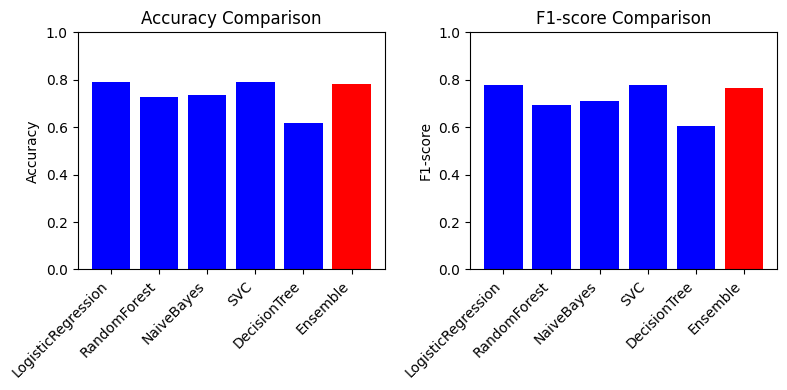

LogisticRegression: Accuracy=0.79, F1=0.78
RandomForest: Accuracy=0.73, F1=0.69
NaiveBayes: Accuracy=0.73, F1=0.71
SVC: Accuracy=0.79, F1=0.78
DecisionTree: Accuracy=0.62, F1=0.60
Ensemble: Accuracy=0.78, F1=0.77


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['Plot'], df['Genre'], test_size=0.2, random_state=42)

# 2. Cria pipelines para cada classificador
pipelines = {
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', LogisticRegression())
    ]),
    'RandomForest': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', RandomForestClassifier())
    ]),
    'NaiveBayes': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', BernoulliNB())
    ]),
    'SVC': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', SVC(probability=True))  # probabilidade=True para permitir voting por probabilidade, se desejado
    ]),
    'DecisionTree': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
        ('clf', DecisionTreeClassifier())
    ])
}

# 3. Cria o ensemble
#   Observação: VotingClassifier requer uma lista de tuplas (nome, estimador)
ensemble_classifier = VotingClassifier([
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('nb', BernoulliNB()),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')  # ou 'soft' para votar por probabilidade

model_ensemble = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', binary=True)),
    ('ensemble', ensemble_classifier)
])

# 4. Treina todos os pipelines e coleta métricas
model_names = []
accuracies = []
f1_scores = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)

# Treina o ensemble
model_ensemble.fit(X_train, y_train)
y_pred_ensemble = model_ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='macro')

model_names.append('Ensemble')
accuracies.append(acc_ensemble)
f1_scores.append(f1_ensemble)

# 5. Plotando gráfico comparativo
plt.figure(figsize=(8, 4))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
colors = ['blue'] * (len(model_names) - 1) + ['red']  # Último será o ensemble
plt.bar(model_names, accuracies, color=colors)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Gráfico de F1-score
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color=colors)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')

plt.tight_layout()
plt.show()

# Impressão dos resultados numéricos
for i, name in enumerate(model_names):
    print(f'{name}: Accuracy={accuracies[i]:.2f}, F1={f1_scores[i]:.2f}')

    Interpretação dos Resultados

    Observando os valores de Accuracy e F1-score para cada modelo, temos:
        •	LogisticRegression e SVC apresentam as melhores métricas gerais, ambos com Accuracy de aproximadamente 0.79 e F1-score de 0.78.
        •	RandomForest e NaiveBayes têm desempenhos intermediários, com Accuracy em torno de 0.73. Contudo, a NaiveBayes atinge um F1-score um pouco superior à RandomForest (0.71 vs. 0.69).
        •	DecisionTree obteve o menor desempenho entre todos, com Accuracy de 0.62 e F1-score de 0.60.
        •	O Ensemble (VotingClassifier) ficou ligeiramente abaixo de LogisticRegression e SVC, atingindo Accuracy de 0.78 e F1-score de 0.77. Embora não tenha superado os melhores modelos individuais, apresenta resultados próximos.

    Comentários
        1.	Modelos que se destacaram: LogisticRegression e SVC tiveram desempenhos muito similares e lideram tanto em Accuracy quanto em F1-score. Isso indica que ambas as abordagens conseguem capturar bem os padrões do texto para distinguir entre os gêneros (Drama e Comédia).
        2.	Modelos intermediários: RandomForest e NaiveBayes apresentaram resultados razoáveis, mas não superaram as duas melhores abordagens. A RandomForest muitas vezes requer ajustes nos hiperparâmetros (número de árvores, profundidade, etc.) para melhorar seu desempenho. Já o NaiveBayes costuma ser uma boa escolha para classificação de texto, pois lida bem com dados esparsos e de alta dimensionalidade.
        3.	DecisionTree isolada: Obteve a menor taxa de acerto. Árvores de decisão únicas podem ter dificuldades com dados complexos, mas podem servir de base para métodos de ensemble como RandomForest.
        4.	Ensemble: A estratégia de votação (VotingClassifier) combinou os modelos LogisticRegression, RandomForest, NaiveBayes, SVC e DecisionTree. Apesar de muitas vezes gerar melhoria no desempenho, aqui o ensemble não superou significativamente os melhores modelos individuais (LogisticRegression e SVC). Isso pode ocorrer por diversos fatores, como:
        •	Forma de votação (hard vs. soft);
        •	Pesos iguais para todos os modelos;
        •	Modelos individuais com performances muito distintas.
        5.	Possíveis aprimoramentos:
        •	Ajustar hiperparâmetros de cada modelo antes de criar o ensemble;
        •	Testar diferentes estratégias de votação (soft voting, por exemplo);
        •	Explorar técnicas de feature engineering ou preprocessing mais avançadas (remoção de stopwords, stemming, lemmatization, etc.);
        •	Utilizar outras representações de texto (como Word Embeddings ou embeddings de linguagem pré-treinados).

    No geral, a análise mostra que tanto LogisticRegression quanto SVC são modelos robustos para esse conjunto de dados, enquanto o ensemble não se destaca tanto na configuração atual. Ajustes finos podem melhorar o desempenho do ensemble e aproximá-lo ou até mesmo superá-lo em relação aos melhores modelos individuais.

# um código mais rápido

    A seguir estão algumas sugestões para tornar o processamento do seu código mais rápido, mantendo o mesmo objetivo e escopo (ou seja, sem alterar a tarefa de classificação e a comparação dos modelos):

    ⸻

    1. Limitar o vocabulário do TfidfVectorizer

    Por padrão, o TfidfVectorizer pode gerar milhares (ou até dezenas de milhares) de atributos, dependendo do tamanho do texto. Isso impacta diretamente no tempo de treino de todos os modelos. Você pode, por exemplo, limitar o número máximo de palavras (max_features) e/ou filtrar palavras muito frequentes (max_df) ou muito raras (min_df). Exemplo:

    TfidfVectorizer(
        stop_words='english',
        binary=True,
        max_features=10000,    # limita o número de tokens
        max_df=0.95,           # ignora tokens que aparecem em mais de 95% dos documentos
        min_df=2               # ignora tokens que aparecem em menos de 2 documentos
    )

    Esses parâmetros costumam reduzir bastante a dimensionalidade, acelerando o treinamento.

    ⸻

    2. Paralelizar modelos que suportam n_jobs

    Alguns classificadores, como o RandomForestClassifier, podem ser paralelizados via parâmetro n_jobs. Por exemplo, se você tem uma máquina com múltiplos núcleos, pode configurar:

    RandomForestClassifier(n_estimators=100, n_jobs=-1)

    Definir n_jobs=-1 utiliza todos os núcleos disponíveis, acelerando o treinamento em máquinas multicore.

    Da mesma forma, em versões recentes do scikit-learn, LogisticRegression pode receber n_jobs se estiver usando os solvers sag ou saga:

    LogisticRegression(solver='saga', n_jobs=-1)

    Já o SVC não possui suporte nativo a n_jobs (a não ser que você utilize implementações específicas ou bibliotecas como o scikit-learn-intelex ou joblib.parallel_backend, mas isso é mais avançado).

    ⸻

    3. Remover probability=True do SVC, se não for necessário

    Se você está usando voting='hard' no VotingClassifier, não precisa calcular probabilidades no SVC. Calcular as probabilidades (probability=True) no SVC é mais custoso, pois internamente ele roda um procedimento adicional (Platt scaling) para estimar probabilidades. Se o ensemble não está fazendo soft voting, remover essa opção torna o treino do SVC bem mais rápido:

    SVC(probability=False)



    ⸻

    4. Reduzir a complexidade de alguns modelos
        •	RandomForest: reduzir o número de árvores (n_estimators) ou limitar a profundidade das árvores (max_depth) pode acelerar o treinamento, ainda que às custas de algum desempenho.
        •	DecisionTree: definir max_depth ou outros hiperparâmetros para podar a árvore também ajuda:

    DecisionTreeClassifier(max_depth=10, random_state=42)

    Isso reduz o risco de overfitting e acelera consideravelmente o processo de treino.

    ⸻

    5. Evitar recomputar o Tfidf para cada modelo (opcional)

    Hoje, você cria um pipeline completo para cada modelo. Embora seja muito prático, faz com que o TfidfVectorizer seja ajustado e transformado repetidas vezes. Uma opção (sem alterar o objetivo) é:
        1.	Realizar uma só vez a transformação TF-IDF do texto.
        2.	Armazenar X_train_tfidf e X_test_tfidf.
        3.	Passar esses dados prontos para cada classificador (sem pipeline) ou usar pipelines mas com TfidfVectorizer fixo.

    Exemplo simplificado:

    # Ajusta e transforma apenas uma vez
    tfidf = TfidfVectorizer(stop_words='english', binary=True, max_features=10000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Agora treine cada modelo diretamente
    clf = LogisticRegression()
    clf.fit(X_train_tfidf, y_train)
    # ...

    Isso evita recalcular TF-IDF para cada modelo, economizando tempo de processamento.

    ⸻

    6. Exemplo de código modificado

    Abaixo, um trecho que ilustra como aplicar algumas dessas mudanças. Note que não é necessário aplicar todas as sugestões ao mesmo tempo; você pode escolher as que melhor se adequam ao seu cenário:
```python
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, VotingClassifier
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier

    # 1. Carrega o dataset
    df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

    # Divide em treino e teste
    X_train, X_test, y_train = ... # seu código de split

    # 2. Cria pipelines para cada classificador (com ajustes de performance)
    pipelines = {
        'LogisticRegression': Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
            ('clf', LogisticRegression(solver='saga', n_jobs=-1, random_state=42))
        ]),
        'RandomForest': Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
            ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42))
        ]),
        'NaiveBayes': Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
            ('clf', BernoulliNB())
        ]),
        'SVC': Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
            ('clf', SVC(probability=False, random_state=42))  # remove probability se for usar voting='hard'
        ]),
        'DecisionTree': Pipeline([
            ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
            ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))
        ])
    }

    # 3. Cria o ensemble (voting='hard', sem necessidade de probability=True)
    ensemble_classifier = VotingClassifier([
        ('lr', LogisticRegression(solver='saga', n_jobs=-1, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)),
        ('nb', BernoulliNB()),
        ('svc', SVC(probability=False, random_state=42)),
        ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
    ], voting='hard')

    model_ensemble = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('ensemble', ensemble_classifier)
    ])

    # 4. Treina todos os pipelines e coleta métricas
    model_names = []
    accuracies = []
    f1_scores = []

    for name, pipe in pipelines.items():
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        model_names.append(name)
        accuracies.append(acc)
        f1_scores.append(f1)

    # Treina o ensemble
    model_ensemble.fit(X_train, y_train)
    y_pred_ensemble = model_ensemble.predict(X_test)
    acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
    f1_ensemble = f1_score(y_test, y_pred_ensemble, average='macro')

    model_names.append('Ensemble')
    accuracies.append(acc_ensemble)
    f1_scores.append(f1_ensemble)

    # 5. Plotando gráfico comparativo (mesmo código)

    # ... seu código de plot ...

    # Impressão dos resultados
    for i, name in enumerate(model_names):
        print(f'{name}: Accuracy={accuracies[i]:.2f}, F1={f1_scores[i]:.2f}')

```

    ⸻

    Conclusão

    Para acelerar o processamento, foque em:
        1.	Reduzir a dimensionalidade do TF-IDF (limitando max_features, usando min_df, max_df etc.).
        2.	Paralelizar os classificadores que suportam n_jobs.
        3.	Evitar o cálculo desnecessário de probabilidades no SVC (caso não use soft voting).
        4.	Restringir a complexidade de modelos como RandomForest e DecisionTree.
        5.	(Opcional) Evitar recomputar o TF-IDF para cada modelo se quiser manter apenas uma única transformação de texto.

    Esses ajustes geralmente trazem ganhos significativos de performance sem alterar o objetivo principal do código.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv')

from sklearn.model_selection import train_test_split

# Supondo que o dataframe tenha colunas 'Plot' e 'Genre'
X_train, X_test, y_train, y_test = train_test_split(
    df['Plot'],
    df['Genre'],
    test_size=0.2,
    random_state=42
)

# 2. Cria pipelines para cada classificador (com ajustes de performance)
pipelines = {
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('clf', LogisticRegression(solver='saga', n_jobs=-1, random_state=42))
    ]),
    'RandomForest': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42))
    ]),
    'NaiveBayes': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('clf', BernoulliNB())
    ]),
    'SVC': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('clf', SVC(probability=False, random_state=42))  # remove probability se for usar voting='hard'
    ]),
    'DecisionTree': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
        ('clf', DecisionTreeClassifier(max_depth=10, random_state=42))
    ])
}

# 3. Cria o ensemble (voting='hard', sem necessidade de probability=True)
ensemble_classifier = VotingClassifier([
    ('lr', LogisticRegression(solver='saga', n_jobs=-1, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)),
    ('nb', BernoulliNB()),
    ('svc', SVC(probability=False, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42))
], voting='hard')

model_ensemble = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', binary=True, max_features=10000)),
    ('ensemble', ensemble_classifier)
])

# 4. Treina todos os pipelines e coleta métricas
model_names = []
accuracies = []
f1_scores = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)

# Treina o ensemble
model_ensemble.fit(X_train, y_train)
y_pred_ensemble = model_ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='macro')

model_names.append('Ensemble')
accuracies.append(acc_ensemble)
f1_scores.append(f1_ensemble)

# 5. Plotando gráfico comparativo (mesmo código)

# ... seu código de plot ...

# Impressão dos resultados
for i, name in enumerate(model_names):
    print(f'{name}: Accuracy={accuracies[i]:.2f}, F1={f1_scores[i]:.2f}')

LogisticRegression: Accuracy=0.79, F1=0.78
RandomForest: Accuracy=0.74, F1=0.72
NaiveBayes: Accuracy=0.74, F1=0.72
SVC: Accuracy=0.79, F1=0.78
DecisionTree: Accuracy=0.60, F1=0.60
Ensemble: Accuracy=0.79, F1=0.78


    Análise dos Resultados

    Os resultados obtidos mostram o desempenho dos diferentes modelos para a tarefa de classificação de gêneros (Drama vs. Comédia) a partir dos plots dos filmes. Segue a análise:

    Desempenho Individual dos Modelos
        •	LogisticRegression e SVC
        •	Accuracy: 0.79
        •	F1-score: 0.78
    Esses modelos se destacam, alcançando as melhores métricas individuais. Isso indica que ambos são capazes de capturar os padrões presentes nos textos de forma eficaz.
        •	RandomForest e NaiveBayes
        •	Accuracy: 0.74
        •	F1-score: 0.72
    Ambos apresentam desempenho intermediário, ligeiramente abaixo dos melhores (LogisticRegression e SVC). O RandomForest pode exigir ajustes adicionais de hiperparâmetros (como número de árvores ou profundidade máxima) para melhorar sua performance. O BernoulliNB, que lida bem com dados esparsos, mostra resultados consistentes, mas não se iguala aos dois melhores.
        •	DecisionTree
        •	Accuracy: 0.60
        •	F1-score: 0.60
    O classificador baseado em árvore de decisão, sem técnicas de ensemble, apresenta a pior performance. Isso é esperado, pois árvores de decisão simples tendem a ter dificuldade com a alta dimensionalidade e a complexidade dos dados textuais.

    Desempenho do Ensemble
        •	Ensemble (VotingClassifier)
        •	Accuracy: 0.79
        •	F1-score: 0.78
    O ensemble combina os modelos individuais por votação majoritária. O fato de ele alcançar métricas iguais aos melhores modelos (LogisticRegression e SVC) indica que a votação conseguiu equilibrar os erros dos modelos menos precisos (como o DecisionTree), mas não proporcionou um ganho significativo em relação aos melhores classificadores isolados.

    Considerações Finais
        •	Robustez dos Modelos Individuais:
    LogisticRegression e SVC demonstram uma capacidade robusta para lidar com a tarefa de classificação nesse conjunto de dados, possivelmente devido à sua boa generalização em dados de alta dimensionalidade.
        •	Valor do Ensemble:
    O ensemble, embora não melhore significativamente as métricas dos melhores modelos, oferece uma abordagem que tende a reduzir a variância e pode ser mais estável em cenários com dados ligeiramente diferentes ou ruídos.
        •	Possíveis Ajustes:
    Para tentar obter ganhos no ensemble, pode ser interessante ajustar os pesos dos modelos ou explorar estratégias de votação “soft” (quando possível), desde que os modelos possam gerar probabilidades de forma eficiente.

    Em resumo, a análise indica que, para esse conjunto de dados, LogisticRegression e SVC são escolhas sólidas, e a combinação via ensemble se iguala a elas, reforçando a robustez desses métodos para classificação de textos.

## _O que é SVC?_

    SVC (Support Vector Classification) é um classificador baseado na técnica de Support Vector Machines (SVM). Abaixo, alguns pontos-chave sobre o SVC:
        •	Objetivo:
    O SVC busca encontrar o hiperplano que melhor separa as classes dos dados, maximizando a margem entre elas. Essa margem é a distância entre os pontos mais próximos de cada classe (os chamados support vectors).
        •	Funcionamento:
        •	Utiliza funções de kernel (como linear, polinomial, RBF, etc.) para transformar os dados em espaços de alta dimensão, facilitando a separação entre classes não linearmente separáveis.
        •	O modelo tenta minimizar o erro de classificação, enquanto maximiza a margem, resultando em um equilíbrio entre a complexidade do modelo e sua capacidade de generalização.
        •	Aplicações:
    É amplamente usado em tarefas de classificação, como reconhecimento de padrões, classificação de textos, imagens, entre outros, especialmente quando os dados possuem alta dimensionalidade.

    Em resumo, o SVC é uma implementação prática das SVMs focada na classificação, oferecendo robustez e flexibilidade para lidar com diversos tipos de dados e desafios em problemas de classificação.